### Importing packages

In [1]:
# ! pip install -U pandas squarify lxml networkx folderstats

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

import xml.etree.ElementTree as ET
from lxml import etree
from bs4 import BeautifulSoup as bs

import squarify

### Examining files

In [3]:
path = '/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/'

files = []
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r, file))

In [4]:
print(len(files))
for f in files[0:10]:
    print(f)

175600
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860220.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860102.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860222.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860103.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860221.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860104.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860223.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860105.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/APA_19860224.xml
/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/artikel_/APA/1986/

[using a pre-generated folderstats csv](https://janakiev.com/blog/python-filesystem-analysis/)

In [5]:
# !folderstats ~/shared/C_amc_141/ -p -i -v -o ~/AMC_Corpus_Biases/csv/files_corpus.csv
# !folderstats ~/shared/C_amc_141/R_amc_3.1_12921/ -p -i -v -o ~/AMC_Corpus_Biases/csv/files_corpus_3.1.csv

In [6]:
df_files = pd.read_csv('../csv/files_corpus_3.1.csv')
df_files = df_files[df_files['folder'] == False]
df_files.drop(['id', 'num_files'], axis=1, inplace=True)
df_files['path'] = df_files['path'].str.replace('/home/jovyan/shared/C_amc_141/R_amc_3.1_12921/203_vert_spacy_rftt/', '')
df_files['main'] = df_files['path'].str.extract(r'([A-Za-z-_]+)(\/)', expand=False)[0]
df_files['source'] = df_files['path'].str.extract(r'([A-Za-z-_]+)\/([A-Za-z-_]+)(\/)', expand=False)[1]
df_files['year'] = df_files['path'].str.extract(r'([A-Za-z-_]+)\/([A-Za-z-_]+)\/([0-9]{4})', expand=False)[2]
df_files['date'] = pd.to_datetime(df_files['name'].str.extract(r'([A-Za-z_]+)([0-9]{8})', 
                                                               expand=False)[1], format='%Y%m%d', errors='coerce')
df_files[['date', 'main', 'source', 'year', 'name', 'size', 'path',]].head()

,date,main,source,year,name,size,path
0,1986-02-20,artikel_,APA,1986,APA_19860220,6142251,artikel_/APA/1986/APA_19860220.xml
1,1986-01-02,artikel_,APA,1986,APA_19860102,3397140,artikel_/APA/1986/APA_19860102.xml
2,1986-02-22,artikel_,APA,1986,APA_19860222,3352934,artikel_/APA/1986/APA_19860222.xml
3,1986-01-03,artikel_,APA,1986,APA_19860103,3794819,artikel_/APA/1986/APA_19860103.xml
4,1986-02-21,artikel_,APA,1986,APA_19860221,5763730,artikel_/APA/1986/APA_19860221.xml


In [7]:
df_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175600 entries, 0 to 176739
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   path       175600 non-null  object        
 1   name       175600 non-null  object        
 2   extension  175600 non-null  object        
 3   size       175600 non-null  int64         
 4   atime      175600 non-null  object        
 5   mtime      175600 non-null  object        
 6   ctime      175600 non-null  object        
 7   folder     175600 non-null  bool          
 8   depth      175600 non-null  int64         
 9   parent     175600 non-null  int64         
 10  uid        175600 non-null  int64         
 11  main       175600 non-null  object        
 12  source     171457 non-null  object        
 13  year       171457 non-null  object        
 14  date       175600 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(4), object(9)
memory usage: 20.

#### Saving pickle

In [8]:
df_files.to_pickle('../outputs/df_files.pkl')

### Showing counts of artikels, magazines and TV:

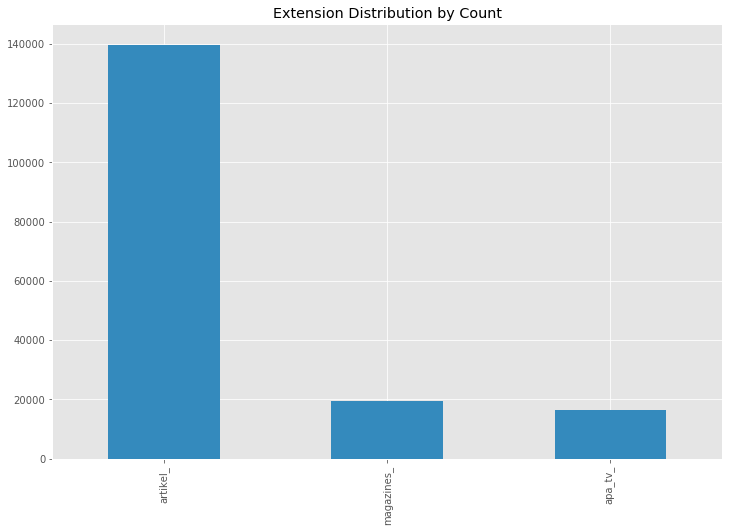

In [9]:
with plt.style.context('ggplot'):
    df_files['main'].value_counts().plot(kind='bar',
                                         figsize=(12,8),
                                         color='C1', 
                                         title='Extension Distribution by Count');

### Showing sources for all artikels, magazines and TV:

#### by size

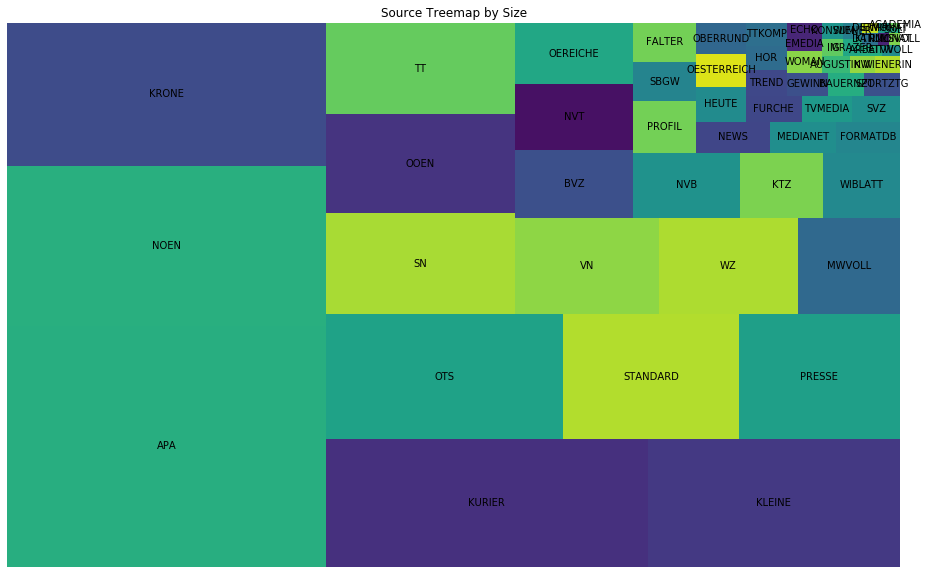

In [10]:
# Group by extension and sum all sizes for each extension
source_sizes = df_files.groupby('source')['size'].sum()

# Sort elements by size
source_sizes = source_sizes.sort_values(ascending=False)

plt.figure(figsize=(16,10))
squarify.plot(sizes=source_sizes.values, 
              label=source_sizes.index.values)

plt.title('Source Treemap by Size')
plt.axis('off');

### Showing sources for artikels only:

#### by size

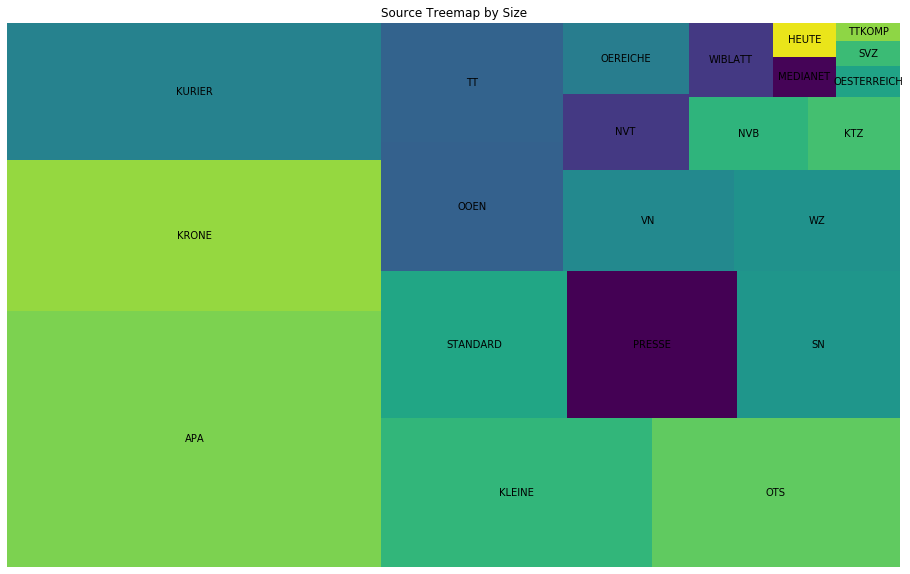

In [11]:
# Group by extension and sum all sizes for each extension
source_sizes = df_files[df_files['main'] == 'artikel_'].groupby('source')['size'].sum()

# Sort elements by size
source_sizes = source_sizes.sort_values(ascending=False)

plt.figure(figsize=(16,10))
squarify.plot(sizes=source_sizes.values, 
              label=source_sizes.index.values)

plt.title('Source Treemap by Size')
plt.axis('off');

#### by count

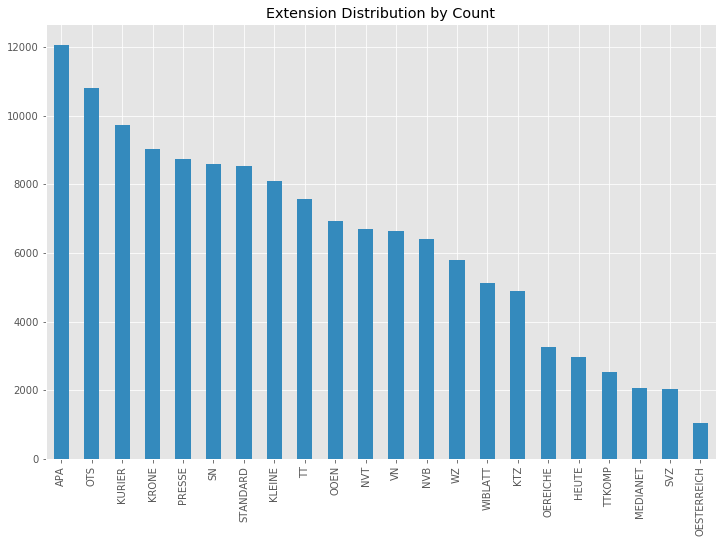

In [12]:
with plt.style.context('ggplot'):
    df_files['source'][df_files['main'] == 'artikel_'].value_counts().plot(kind='bar',
                                                                           figsize=(12,8),
                                                                           color='C1',
                                                                           title='Extension Distribution by Count');

### Temporal evolution of all artikel:

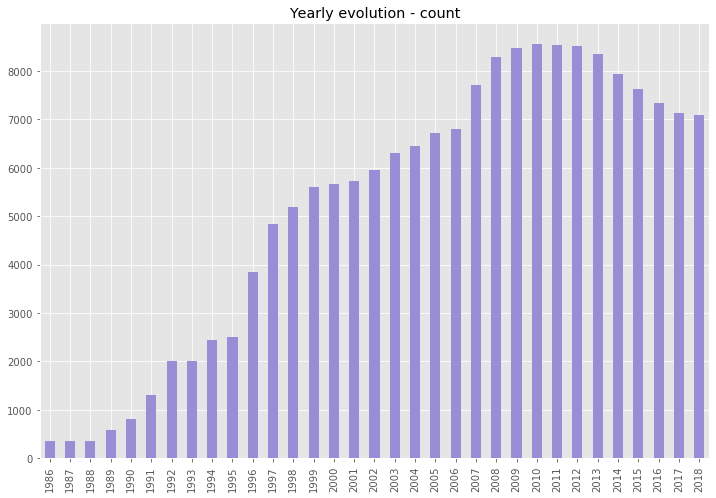

In [13]:
count_by_year = df_files['year'].value_counts().sort_index()
with plt.style.context('ggplot'):
    count_by_year.plot(kind='bar',
                       figsize=(12,8),
                       color='C2',
                       title='Yearly evolution - count');